<a href="https://colab.research.google.com/github/NSPFD/TERM_PAPER/blob/main/QUANTUM_HYDROGEN_MOLECULE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTIMATION OF GROUND STATE ENERGY OF SMALL MOLECULES BASED ON QUANTUM COMPUTER**


In this chapter, we introduce a method to convert the Hamiltonian of an interacting electron system into a form that is easy for quantum computers to handle using OpenFermion[1], a python library for quantum chemistry calculation. OpenFermion provides connectivity to the open source libraries for quantum chemical calculations Psi4 and PySCF. Even if you do not understand the details of how to use these libraries, you can obtain the Hamiltonian of the electron system that appears in quantum chemical calculations simply by entering the structure of the molecule. Here, we use PySCF.

In [87]:
## If various libraries are not installed, please execute.
## If you run on Google Colaboratory, ignore the following message waring, 'You must restart the runtime in order to use newly installed versions.'
## Resuming runtime will lead to a crash.
!pip install pyscf openfermion openfermionpyscf


## Run only if you are in Google Colaboratory or in a local environment where Qulacs is not installed
## Qulacs errors will now be output normally.
!pip3 install wurlitzer
%load_ext wurlitzer



The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [88]:
#Import required libraries
#If you get an error, install openfermion later than v.1.0.0
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
from openfermion.linalg import get_sparse_operator
from openfermion.ops import FermionOperator
from openfermionpyscf import run_pyscf
from pyscf import fci

**Calculation of hydrogen molecule**

In OpenFermion, we enter data describing molecules into MolecularData class.





In [89]:
#define constants
basis = "sto-3g"  #basis set
multiplicity = 1  #spin multiplicity
charge = 0        #total charge for the molecule
distance = 0.7122
geometry = [("H",(0,0,0.356)),("H", (0,0,-0.356))]  #xyz coordinates for atoms
description = str(distance)  #description for the psi4 output file

molecule = MolecularData(geometry, basis, multiplicity, charge, description)

**Variable description**

The meaning of the variables appearing in the above code is explained
below.:


Basis: basis function

Set basis functions for representing molecular orbitals. There are various basis sets such as sto-3g, 6-31G.

sto-3g (Slater Type Orbital - 3 Gaussian) used here is a basis function that approximates Slater type orbital with 3 Gaussians.

Slater type orbital is an orbital that resembles the solution of a hydrogen atom. As a radial function, we use
Rnl(r)=rn−lexp(−Z−sna0r),

In angular direction, we use spherical harmonic function Ylm(θ,ϕ)

.

sto-3g uses a function which approximates this radial wavefunction Rnl(r)

with three Gaussians.
Multiplicity: spin multiplicity

Since electrons have a spin of 1/2, the spin multiplicity is 2 when one electron exists in isolation. However, in the case of a hydrogen molecule, electrons form a singlet in the ground state, and the total spin is 0. Since spin 0 has only one state, the spin multiplicity is set to 1 in this case.
Charge: total charge

Input the total charge. When considering an ion, it becomes + or −.
Geometry: nuclear configuration

Specify atomic species and their coordinates in x,y,z.
Description

The output results calculated by PySCF are saved in the directory where the OpenFermion library is saved. This is a variable that determines the name of the file.


In [90]:
molecule = run_pyscf(molecule,run_scf=1,run_fci=1)

Calculation with PySCF

Input the MolecularData set above to the function run_pyscf and perform quantum chemical calculations with PySCF. It should finish in a few seconds.

In [91]:
print("HF energy: {} (Hartree)".format(molecule.hf_energy))
print("FCI energy: {} (Hartree)".format(molecule.fci_energy))

HF energy: -1.117505831043514 (Hartree)
FCI energy: -1.1368382276023525 (Hartree)


HF & Full-CI energy

Let’s take a look at the Hartree-Fock energy and Full-CI energy (=exact basis energy) calculated by PySCF. (1 Hartree = 27.2116 eV)

In [92]:
print(molecule.one_body_integrals)


[[-1.27041614e+00 -2.93108302e-16]
 [-1.83137879e-16 -4.56670371e-01]]


One-Electron integral hij
・Two-Electron integral hijkl


Quantities such as the one-electron and two-electron integrals are also stored in the MolecularData class.



In [93]:
print(molecule.two_body_integrals)



[[[[ 6.80100025e-01  5.32491095e-17]
   [-2.39592939e-17  1.79657685e-01]]

  [[-2.39592939e-17  1.79657685e-01]
   [ 6.68612516e-01  4.20873114e-17]]]


 [[[ 5.32491095e-17  6.68612516e-01]
   [ 1.79657685e-01  2.45052321e-16]]

  [[ 1.79657685e-01  2.45052321e-16]
   [ 4.20873114e-17  7.02850976e-01]]]]



Hamiltonian in second quantized form

OpenFermion computes the Hamiltonian of the second quantized form from these integrals.
H=∑ihijc†icj+∑ijklhijklc†ic†jckcl

(For the second quantization, see e.g. reference [2]). The Hamiltonian can be calculated by calling the get_molecular_hamiltonian method.

For example, (3,1) represents c†3
, while (1,0) is used to denote c1 .

In [94]:
print(molecule.get_molecular_hamiltonian())

() 0.7432264198314608
((0, 1), (0, 0)) -1.2704161378550272
((1, 1), (1, 0)) -1.2704161378550272
((2, 1), (2, 0)) -0.45667037078973216
((3, 1), (3, 0)) -0.45667037078973216
((0, 1), (0, 1), (0, 0), (0, 0)) 0.34005001241754007
((0, 1), (0, 1), (2, 0), (2, 0)) 0.08982884240313226
((0, 1), (1, 1), (1, 0), (0, 0)) 0.34005001241754007
((0, 1), (1, 1), (3, 0), (2, 0)) 0.08982884240313226
((0, 1), (2, 1), (0, 0), (2, 0)) 0.08982884240313226
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3343062582298406
((0, 1), (3, 1), (1, 0), (2, 0)) 0.08982884240313226
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3343062582298406
((1, 1), (0, 1), (0, 0), (1, 0)) 0.34005001241754007
((1, 1), (0, 1), (2, 0), (3, 0)) 0.08982884240313226
((1, 1), (1, 1), (1, 0), (1, 0)) 0.34005001241754007
((1, 1), (1, 1), (3, 0), (3, 0)) 0.08982884240313226
((1, 1), (2, 1), (0, 0), (3, 0)) 0.08982884240313226
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3343062582298406
((1, 1), (3, 1), (1, 0), (3, 0)) 0.08982884240313226
((1, 1), (3, 1), (3, 0), (1, 0)) 0.3

Convert to tractable operators for quantum computers

The easiest to handle on a quantum computer are the Pauli operators I,X,Y,Z

and their tensor products. Therefore, in order to treat the Hamiltonian of ordinary electrons with a quantum computer, convert the Hamiltonian of the second quantization form
Hfermion=∑ihijc†icj+∑ijklhijklc†ic†jckcl

to
Hqubit=∑P∈{I,X,Y,Z}⊗nhPP

Various transformation methods have been proposed, but here we use the simplest one, called the Jordan-Wigner transformation. In the Jordan-Wigner transformation, the molecular orbital i
corresponds to the i-th qubit. The state that the molecular orbital is occupied by an electron is represented with |1⟩, otherwise |0⟩

.

Under such a convention, constructing the Pauli operator so as to satisfy the anticommutation relation of the following creation-annihilation operator of fermion,
{c†i,c†j}=c†ic†j+c†jc†i=0,{ci,cj}=0,{c†i,cj}=δij

we obtain
a†j↔Xj−iYj2⊗Zj−1⊗Zj−2⋯Z1

For transformation methods other than the Jordan-Wigner transformation, see [2][3].

Jordan-Wigner transformation is implemented in OpenFermion. By passing FermionOperator to jordan_wigner function, it will return QubitOperator corresponding to the Jordan-Wigner transformation of that operator. Below, the FermionOperator is created from the MolecularData of the hydrogen molecule created above, and the Jordan-Wigner transform is used to convert the Hamiltonian of the hydrogen molecule into a form that can be easily handled by a quantum computer.

In [95]:
jw_hamiltonian = jordan_wigner(get_fermion_operator(molecule.get_molecular_hamiltonian()))
print(jw_hamiltonian)

(-0.05933866442819702+0j) [] +
(-0.04491442120156613+0j) [X0 X1 Y2 Y3] +
(0.04491442120156613+0j) [X0 Y1 Y2 X3] +
(0.04491442120156613+0j) [Y0 X1 X2 Y3] +
(-0.04491442120156613+0j) [Y0 Y1 X2 X3] +
(0.17579122569046915+0j) [Z0] +
(0.17002500620877004+0j) [Z0 Z1] +
(0.12223870791335414+0j) [Z0 Z2] +
(0.16715312911492028+0j) [Z0 Z3] +
(0.1757912256904691+0j) [Z1] +
(0.16715312911492028+0j) [Z1 Z2] +
(0.12223870791335414+0j) [Z1 Z3] +
(-0.2367693957531912+0j) [Z2] +
(0.17571274411978283+0j) [Z2 Z3] +
(-0.23676939575319117+0j) [Z3]


Let’s calculate the Hartree-Fock (HF) energy from this Hamiltonian. In the Jordan-Wigner transform, the qubit |0⟩,|1⟩ and the orbital occupancy numbers correspond one-to-one. Therefore, in order to calculate the HF energy, calculate the expected value for |1100⟩. Because there are 2 electrons, the state is filled with 1 twice from the bottom.

In [96]:
# function for computing the tensor product
def kron_N(*ops):
    tmp = ops[0]
    for op in ops[1:]:
        tmp = np.kron(tmp,op)
    return tmp

bra0 = np.array([[1,0]])
bra1 = np.array([[0,1]])
HFbra = kron_N(bra1, bra1, bra0, bra0)
HFket = HFbra.T
print(HFbra)
jw_matrix = get_sparse_operator(jw_hamiltonian)
print(np.real(HFbra.dot(jw_matrix.dot(HFket))), molecule.hf_energy)


[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
[[-1.11750583]] -1.117505831043514


It can be confirmed that it almost matches the calculation of PySCF.

Now let’s diagonalize the Hamiltonian and see that the result agrees with the Full-CI (exact solution) energy.

In [97]:
eigenenergies, eigenvecs = np.linalg.eigh(jw_matrix.toarray())
print(eigenenergies[0], molecule.fci_energy)


-1.1368382276023525 -1.1368382276023525


It can be confirmed that this also almost matches. The ground state wavefunction ∣∣ψg⟩ is

In [98]:
print(eigenvecs[:,0])



[ 0.        +0.j  0.        +0.j  0.        +0.j  0.1069892 +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.99426018+0.j  0.        +0.j  0.        +0.j  0.        +0.j]


∣∣ψg⟩≈−0.995|1100⟩+0.0955|0011⟩. It turns out that the Hartree-Fock solution |1100⟩ is slightly combined with the two-electron excited state |0011⟩.

6-2. Implementation of variational quantum eigensolver (VQE) using Qulacs

In this section, we show an example of running the variational quantum eigensolver (VQE) on a simulator using Qulacs for a quantum chemical Hamiltonian obtained using OpenFermion and PySCF, and searching the ground state.

requirements

    qulacs

    openfermion

    openfermion-pyscf

    pyscf

    scipy

    numpy

Install and Import of required packages



In [99]:
## Run if required libraries are not installed
## If you run on Google Colaboratory, igore the warning 'You must restart the runtime in order to use newly installed versions.'
## If you restart runtime, calculation may crash.
!pip install qulacs pyscf openfermion openfermionpyscf

## Run only in Google Colaboratory or (Linux or Mac) jupyter notebook environment
## Qulacs errors will be output normally.
!pip3 install wurlitzer
%load_ext wurlitzer

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [100]:
import qulacs
from openfermion.transforms import get_fermion_operator, jordan_wigner
from openfermion.linalg import get_sparse_operator #If you have an error, please update openfermion later than version 1.0.0
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from scipy.optimize import minimize
from pyscf import fci
import numpy as np
import matplotlib.pyplot as plt

Creation of Hamiltonian

Using the same procedure as in the previous section, Hamiltonian is calculated by PySCF .

In [102]:
basis = "sto-3g"
multiplicity = 1
charge = 0
distance  = 0.7122
geometry = [["H", [0,0,0.356]],["H", [0,0,-0.356]]]
description  = str(distance)
molecule = MolecularData(geometry, basis, multiplicity, charge, description)
molecule = run_pyscf(molecule,run_scf=1,run_fci=1)
n_qubit = molecule.n_qubits
n_electron = molecule.n_electrons
fermionic_hamiltonian = get_fermion_operator(molecule.get_molecular_hamiltonian())
jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)


Convert Hamiltonian into qulacs Hamiltonian

In Qulacs, observable like Hamiltonian is treated with Observable class. There is a function to convert OpenFermion Hamiltonian into Qulacs Observable named create_observable_from_openfermion_text. Lets’s use this.

In [103]:
from qulacs import Observable
from qulacs.observable import create_observable_from_openfermion_text
qulacs_hamiltonian = create_observable_from_openfermion_text(str(jw_hamiltonian))


compose ansatz

Here, we compose a quantum circuit on Qulacs. The quantum circuits were modeled after those used in experiments with superconducting qubits (A. Kandala et. al. , “Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets“, Nature 549, 242–246).

In [104]:
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import CZ, RY, RZ, merge

depth = n_qubit

In [105]:
def he_ansatz_circuit(n_qubit, depth, theta_list):
    """he_ansatz_circuit
    Returns hardware efficient ansatz circuit.

    Args:
        n_qubit (:class:`int`):
            the number of qubit used (equivalent to the number of fermionic modes)
        depth (:class:`int`):
            depth of the circuit.
        theta_list (:class:`numpy.ndarray`):
            rotation angles.
    Returns:
        :class:`qulacs.QuantumCircuit`
    """
    circuit = QuantumCircuit(n_qubit)
    for d in range(depth):
        for i in range(n_qubit):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*d]), RZ(i, theta_list[2*i+1+2*n_qubit*d])))
        for i in range(n_qubit//2):
            circuit.add_gate(CZ(2*i, 2*i+1))
        for i in range(n_qubit//2-1):
            circuit.add_gate(CZ(2*i+1, 2*i+2))
    for i in range(n_qubit):
        circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*depth]), RZ(i, theta_list[2*i+1+2*n_qubit*depth])))

    return circuit

Define VQE cost function

As explained in chapter 5-1, VQE obtains an approximate ground state by minimizing the following expectation of Hamiltonian of a state |ψ(θ)⟩=U(θ)|0⟩ which is output from quantum circuit U(θ)

with a parameter .
⟨H(θ)⟩=⟨ψ(θ)|H|ψ(θ)⟩

In [106]:
def cost(theta_list):
    state = QuantumState(n_qubit) #prepare |00000>
    circuit = he_ansatz_circuit(n_qubit, depth, theta_list) #create a quantum circuit
    circuit.update_quantum_state(state) #apply to a quantum circuit
    return qulacs_hamiltonian.get_expectation_value(state) #calculate the expectation of a Hamiltonian


Execute VQE

Now that we’re ready, let’s run VQE. For optimization, the BFGS method implemented in scipy is used, and the initial parameters are randomly selected. It should finish in tens of seconds.

In [107]:
cost_history = []
init_theta_list = np.random.random(2*n_qubit*(depth+1))*1e-1
cost_history.append(cost(init_theta_list))
method = "BFGS"
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}
opt = minimize(cost, init_theta_list,
               method=method,
               callback=lambda x: cost_history.append(cost(x)))

               

Plotting the execution result, we can see that it has converged to the correct solution.

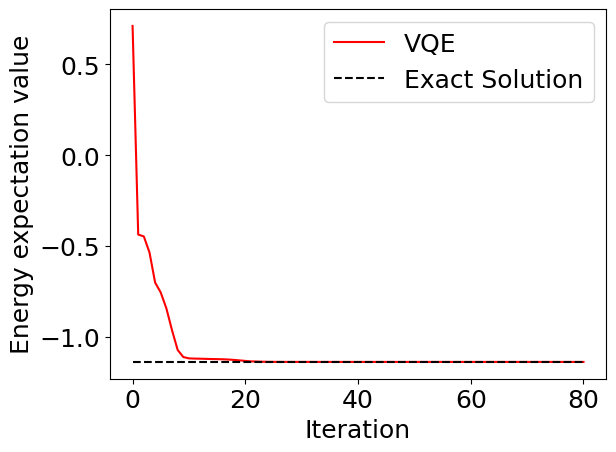

In [108]:
plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="VQE")
plt.plot(range(len(cost_history)), [molecule.fci_energy]*len(cost_history), linestyle="dashed", color="black", label="Exact Solution")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from openfermion.transforms import jordan_wigner
from qulacs import QuantumState, Observable, QuantumCircuit
from qulacs.gate import RY, RZ, CNOT
from scipy.optimize import minimize

# Constants
basis = "sto-3g"  # Basis set
multiplicity = 1  # Spin multiplicity
charge = 0        # Total charge for the molecule

# Function to create the molecule and compute energy
def compute_energy(bond_length):
    distance=0.7122
    geometry = [["H", [0, 0, 0.356]], ["H", [0, 0, -0.356]]]
    description =str(distance)
    molecule = MolecularData(geometry, basis, multiplicity, charge, description)

    # Perform quantum chemistry calculations
    molecule = run_pyscf(molecule, run_scf=True)

    # Get the molecular Hamiltonian and convert to qubit representation
    fermionic_hamiltonian = molecule.get_molecular_hamiltonian()
    qubit_hamiltonian = jordan_wigner(fermionic_hamiltonian)
    n_qubits = molecule.n_qubits

    # Convert to Qulacs Observable
    observable = Observable(n_qubits)
    for term, coeff in qubit_hamiltonian.terms.items():
        pauli_string = " ".join([f"{p[1]} {p[0]}" for p in term])
        observable.add_operator(coeff, pauli_string)

    # Define ansatz
    #def create_ansatz(theta):
        #circuit = QuantumCircuit(n_qubits)
        #circuit.add_gate(RY(0, theta[0]))
        #circuit.add_gate(RY(1, theta[1]))
        #circuit.add_gate(CNOT(0, 1))
        #circuit.add_gate(RZ(1, theta[2]))
        #return circuit
        def he_ansatz_circuit(n_qubit, depth, theta_list):
         circuit = QuantumCircuit(n_qubit)
    for d in range(depth):
        for i in range(n_qubit):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*d]), RZ(i, theta_list[2*i+1+2*n_qubit*d])))
        for i in range(n_qubit//2):
            circuit.add_gate(CZ(2*i, 2*i+1))
        for i in range(n_qubit//2-1):
            circuit.add_gate(CZ(2*i+1, 2*i+2))
    for i in range(n_qubit):
        circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*depth]), RZ(i, theta_list[2*i+1+2*n_qubit*depth])))

    return circuit
      def create_ansatz(theta_list):
        circuit = QuantumCircuit(n_qubits)
        for d in range(depth):
            for i in range(n_qubits):
                circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*d]), RZ(i, theta_list[2*i+1+2*n_qubits*d])))
            for i in range(n_qubits//2):
                circuit.add_gate(CZ(2*i, 2*i+1))
            for i in range(n_qubits//2-1):
                circuit.add_gate(CZ(2*i+1, 2*i+2))
        for i in range(n_qubits):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*depth]), RZ(i, theta_list[2*i+1+2*n_qubits*depth])))
        return circuit


    # Define cost function
    def vqe_cost_function(theta):
        state = QuantumState(n_qubits)
        circuit = create_ansatz(theta)
        circuit.update_quantum_state(state)
        return observable.get_expectation_value(state)

    # Minimize energy using VQE
    initial_theta = np.random.rand(3)
    result = minimize(vqe_cost_function, initial_theta, method="COBYLA")
    total_energy = result.fun
    return total_energy, molecule.nuclear_repulsion

# Loop over various bond lengths
bond_lengths = np.linspace(0.5, 2.0, 20)  # Bond lengths from 0.5 to 2.0 Angstroms
energies = []

for bond_length in bond_lengths:
    total_energy, _ = compute_energy(bond_length)
    energies.append(total_energy)
    print(f"Bond Length: {bond_length:.2f} Å, Total Energy: {total_energy:.6f} Hartree")

# Plot the energy expectation values vs bond lengths
plt.figure(figsize=(8, 6))
plt.plot(bond_lengths, energies, marker='o', linestyle='-', color='blue')
plt.title("Energy Expectation Value vs Bond Length", fontsize=16)
plt.xlabel("Bond Length (Å)", fontsize=14)
plt.ylabel("Energy Expectation Value (Hartree)", fontsize=14)
plt.grid()
plt.show()


NameError: name 'circuit' is not defined

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from openfermion.transforms import jordan_wigner
from qulacs import QuantumState, Observable, QuantumCircuit
from qulacs.gate import RY, RZ, CNOT, CZ, merge # Added CZ and merge imports
from scipy.optimize import minimize

# Constants
basis = "sto-3g"  # Basis set
multiplicity = 1  # Spin multiplicity
charge = 0        # Total charge for the molecule

# Function to create the molecule and compute energy
def compute_energy(bond_length):
    distance = 0.7122
    geometry = [["H", [0, 0, 0.356]], ["H", [0, 0, -0.356]]]
    description = str(distance)
    molecule = MolecularData(geometry, basis, multiplicity, charge, description)

    # Perform quantum chemistry calculations
    molecule = run_pyscf(molecule, run_scf=True)

    # Get the molecular Hamiltonian and convert to qubit representation
    fermionic_hamiltonian = molecule.get_molecular_hamiltonian()
    qubit_hamiltonian = jordan_wigner(fermionic_hamiltonian)
    n_qubits = molecule.n_qubits
    depth = n_qubits # Define depth

    # Convert to Qulacs Observable
    observable = Observable(n_qubits)
    for term, coeff in qubit_hamiltonian.terms.items():
        pauli_string = " ".join([f"{p[1]} {p[0]}" for p in term])
        observable.add_operator(coeff, pauli_string)

    # Define ansatz - Using he_ansatz_circuit
    def create_ansatz(n_qubit, depth,theta_list):
        circuit = QuantumCircuit(n_qubits)
        for d in range(depth):
            for i in range(n_qubits):
                circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*d]), RZ(i, theta_list[2*i+1+2*n_qubits*d])))
            for i in range(n_qubits//2):
                circuit.add_gate(CZ(2*i, 2*i+1))
            for i in range(n_qubits//2-1):
                circuit.add_gate(CZ(2*i+1, 2*i+2))
        for i in range(n_qubits):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*depth]), RZ(i, theta_list[2*i+1+2*n_qubits*depth])))
        return circuit

    # Define cost function
    def vqe_cost_function(n_qubit, depth,theta_list):
        state = QuantumState(n_qubits)
        circuit = create_ansatz(n_qubit, depth,theta_list) # Call create_ansatz with theta_list
        circuit.update_quantum_state(state)
        return observable.get_expectation_value(state)

    # Minimize energy using VQE
    initial_theta_list = np.random.rand(2 * n_qubits * (depth + 1)) # Adjust initial parameters
    result = minimize(vqe_cost_function, initial_theta_list, method="COBYLA")
    total_energy = result.fun
    return total_energy, molecule.nuclear_repulsion

# Loop over various bond lengths
bond_lengths = np.linspace(0.5, 2.0, 20)  # Bond lengths from 0.5 to 2.0 Angstroms
energies = []

for bond_length in bond_lengths:
    total_energy, _ = compute_energy(bond_length)
    energies.append(total_energy)
    print(f"Bond Length: {bond_length:.2f} Å, Total Energy: {total_energy:.6f} Hartree")

# Plot the energy expectation values vs bond lengths
plt.figure(figsize=(8, 6))
plt.plot(bond_lengths, energies, marker='o', linestyle='-', color='blue')
plt.title("Energy Expectation Value vs Bond Length", fontsize=16)
plt.xlabel("Bond Length (Å)", fontsize=14)
plt.ylabel("Energy Expectation Value (Hartree)", fontsize=14)
plt.grid()
plt.show()

TypeError: compute_energy.<locals>.vqe_cost_function() missing 2 required positional arguments: 'depth' and 'theta_list'

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from openfermion.transforms import jordan_wigner
from qulacs import QuantumState, Observable, QuantumCircuit
from qulacs.gate import RY, RZ, CNOT, CZ, merge
from scipy.optimize import minimize

# Constants
basis = "sto-3g"  # Basis set
multiplicity = 1  # Spin multiplicity
charge = 0        # Total charge for the molecule

# Function to create the molecule and compute energy
def compute_energy(bond_length):
    distance = 0.7122
    geometry = [["H", [0, 0, 0.356]], ["H", [0, 0, -0.356]]]
    description = str(distance)
    molecule = MolecularData(geometry, basis, multiplicity, charge, description)

    # Perform quantum chemistry calculations
    molecule = run_pyscf(molecule, run_scf=True)

    # Get the molecular Hamiltonian and convert to qubit representation
    fermionic_hamiltonian = molecule.get_molecular_hamiltonian()
    qubit_hamiltonian = jordan_wigner(fermionic_hamiltonian)
    n_qubits = molecule.n_qubits
    depth = n_qubits # Define depth

    # Convert to Qulacs Observable
    observable = Observable(n_qubits)
    for term, coeff in qubit_hamiltonian.terms.items():
        pauli_string = " ".join([f"{p[1]} {p[0]}" for p in term])
        observable.add_operator(coeff, pauli_string)

    # Define ansatz - Using he_ansatz_circuit
    def create_ansatz(n_qubit, depth, theta_list):
        circuit = QuantumCircuit(n_qubits)
        for d in range(depth):
            for i in range(n_qubits):
                circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*d]), RZ(i, theta_list[2*i+1+2*n_qubits*d])))
            for i in range(n_qubits//2):
                circuit.add_gate(CZ(2*i, 2*i+1))
            for i in range(n_qubits//2-1):
                circuit.add_gate(CZ(2*i+1, 2*i+2))
        for i in range(n_qubits):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*depth]), RZ(i, theta_list[2*i+1+2*n_qubits*depth])))
        return circuit

    # Define cost function
   def cost(theta_list):
    state = QuantumState(n_qubit) #prepare |00000>
    circuit = he_ansatz_circuit(n_qubit, depth, theta_list) #create a quantum circuit
    circuit.update_quantum_state(state) #apply to a quantum circuit
    return qulacs_hamiltonian.get_expectation_value(state) #calculate the expectation of a Hamiltonian
    # Minimize energy using VQE
    initial_theta_list = np.random.rand(2 * n_qubits * (depth + 1)) # Adjust initial parameters
    result = minimize(vqe_cost_function, initial_theta_list, method="COBYLA") # Call with correct arguments
    total_energy = result.fun
    return total_energy, molecule.nuclear_repulsion

# Loop over various bond lengths
bond_lengths = np.linspace(0.5, 2.0, 20)  # Bond lengths from 0.5 to 2.0 Angstroms
energies = []

for bond_length in bond_lengths:
    total_energy, _ = compute_energy(bond_length)
    energies.append(total_energy)
    print(f"Bond Length: {bond_length:.2f} Å, Total Energy: {total_energy:.6f} Hartree")

# Plot the energy expectation values vs bond lengths
plt.figure(figsize=(8, 6))
plt.plot(bond_lengths, energies, marker='o', linestyle='-', color='blue')
plt.title("Energy Expectation Value vs Bond Length", fontsize=16)
plt.xlabel("Bond Length (Å)", fontsize=14)
plt.ylabel("Energy Expectation Value (Hartree)", fontsize=14)
plt.grid()
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 52)

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from openfermion.transforms import jordan_wigner
from qulacs import QuantumState, Observable, QuantumCircuit
from qulacs.gate import RY, RZ, CNOT, CZ, merge
from scipy.optimize import minimize

# Constants
basis = "sto-3g"  # Basis set
multiplicity = 1  # Spin multiplicity
charge = 0        # Total charge for the molecule

# Function to create the molecule and compute energy
def compute_energy(bond_length):
    distance = 0.7122
    geometry = [["H", [0, 0, 0.356]], ["H", [0, 0, -0.356]]]
    description = str(distance)
    molecule = MolecularData(geometry, basis, multiplicity, charge, description)

    # Perform quantum chemistry calculations
    molecule = run_pyscf(molecule, run_scf=True)

    # Get the molecular Hamiltonian and convert to qubit representation
    fermionic_hamiltonian = molecule.get_molecular_hamiltonian()
    qubit_hamiltonian = jordan_wigner(fermionic_hamiltonian)
    n_qubits = molecule.n_qubits
    depth = n_qubits # Define depth

    # Convert to Qulacs Observable
    observable = Observable(n_qubits)
    for term, coeff in qubit_hamiltonian.terms.items():
        pauli_string = " ".join([f"{p[1]} {p[0]}" for p in term])
        observable.add_operator(coeff, pauli_string)

    # Define ansatz - Using he_ansatz_circuit
    def create_ansatz(n_qubit, depth, theta_list):
        circuit = QuantumCircuit(n_qubits)
        for d in range(depth):
            for i in range(n_qubits):
                circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*d]), RZ(i, theta_list[2*i+1+2*n_qubits*d])))
            for i in range(n_qubits//2):
                circuit.add_gate(CZ(2*i, 2*i+1))
            for i in range(n_qubits//2-1):
                circuit.add_gate(CZ(2*i+1, 2*i+2))
        for i in range(n_qubits):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*depth]), RZ(i, theta_list[2*i+1+2*n_qubits*depth])))
        return circuit

    # Define cost function
    #The cost function was defined with an invalid indent, corrected indent
    def vqe_cost_function(theta_list):
        state = QuantumState(n_qubits)
        circuit = create_ansatz(n_qubits, depth, theta_list)  # Pass n_qubits and depth
        circuit.update_quantum_state(state)
        return observable.get_expectation_value(state)
        cost_history = []
init_theta_list = np.random.random(2*n_qubit*(depth+1))*1e-1
cost_history.append(cost(init_theta_list))
method = "BFGS"
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}
opt = minimize(cost, init_theta_list,
               method=method,
               callback=lambda x: cost_history.append(cost(x)))


    # Minimize energy using VQE
    initial_theta_list = np.random.rand(2 * n_qubits * (depth + 1)) # Adjust initial parameters
    #Call vqe_cost_function with correct parameters
    result = minimize(vqe_cost_function, initial_theta_list, method="COBYLA")
    total_energy = result.fun
    return total_energy, molecule.nuclear_repulsion

# Loop over various bond lengths
bond_lengths = np.linspace(0.5, 2.0, 20)  # Bond lengths from 0.5 to 2.0 Angstroms
energies = []

for bond_length in bond_lengths:
    total_energy, _ = compute_energy(bond_length)
    energies.append(total_energy)
    print(f"Bond Length: {bond_length:.2f} Å, Total Energy: {total_energy:.6f} Hartree")

# Plot the energy expectation values vs bond lengths
plt.figure(figsize=(8, 6))
plt.plot(bond_lengths, energies, marker='o', linestyle='-', color='blue')
plt.title("Energy Expectation Value vs Bond Length", fontsize=16)
plt.xlabel("Bond Length (Å)", fontsize=14)
plt.ylabel("Energy Expectation Value (Hartree)", fontsize=14)
plt.grid()
plt.show()

IndentationError: unexpected indent (<ipython-input-142-2bda00c2e82c>, line 69)

Bond Length: 0.50 Å, Total Energy: -1.134422 Hartree
Bond Length: 0.58 Å, Total Energy: -1.118517 Hartree
Bond Length: 0.66 Å, Total Energy: -1.123084 Hartree
Bond Length: 0.74 Å, Total Energy: -1.131407 Hartree
Bond Length: 0.82 Å, Total Energy: -1.130820 Hartree
Bond Length: 0.89 Å, Total Energy: -1.117223 Hartree
Bond Length: 0.97 Å, Total Energy: -1.128153 Hartree
Bond Length: 1.05 Å, Total Energy: -1.125551 Hartree
Bond Length: 1.13 Å, Total Energy: -1.122189 Hartree
Bond Length: 1.21 Å, Total Energy: -1.118093 Hartree
Bond Length: 1.29 Å, Total Energy: -1.134930 Hartree
Bond Length: 1.37 Å, Total Energy: -1.130777 Hartree
Bond Length: 1.45 Å, Total Energy: -1.119424 Hartree
Bond Length: 1.53 Å, Total Energy: -1.117501 Hartree
Bond Length: 1.61 Å, Total Energy: -1.118866 Hartree
Bond Length: 1.68 Å, Total Energy: -1.123900 Hartree
Bond Length: 1.76 Å, Total Energy: -1.127828 Hartree
Bond Length: 1.84 Å, Total Energy: -1.117393 Hartree
Bond Length: 1.92 Å, Total Energy: -1.117165 H

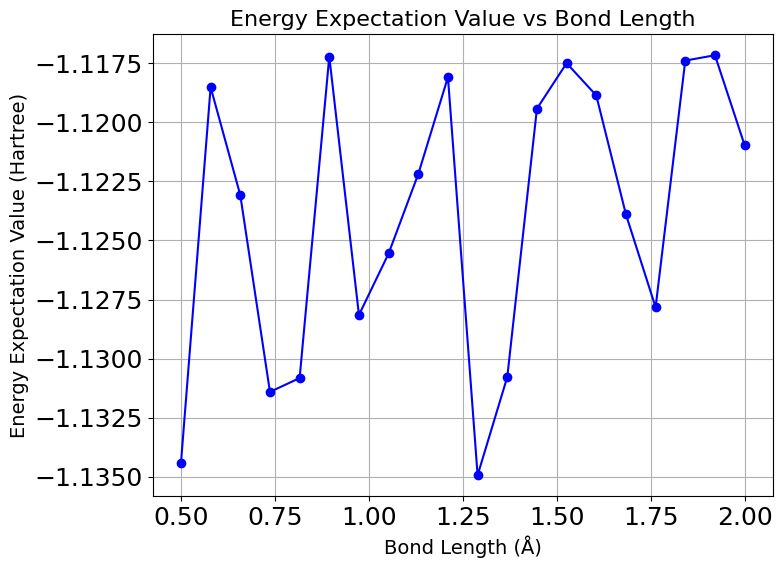

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from openfermion.transforms import jordan_wigner
from qulacs import QuantumState, Observable, QuantumCircuit
from qulacs.gate import RY, RZ, CNOT, CZ, merge
from scipy.optimize import minimize

# Constants
basis = "sto-3g"  # Basis set
multiplicity = 1  # Spin multiplicity
charge = 0        # Total charge for the molecule

# Function to create the molecule and compute energy
def compute_energy(bond_length):
    distance = 0.7122
    geometry = [["H", [0, 0, 0.356]], ["H", [0, 0, -0.356]]]
    description = str(distance)
    molecule = MolecularData(geometry, basis, multiplicity, charge, description)

    # Perform quantum chemistry calculations
    molecule = run_pyscf(molecule, run_scf=True)

    # Get the molecular Hamiltonian and convert to qubit representation
    fermionic_hamiltonian = molecule.get_molecular_hamiltonian()
    qubit_hamiltonian = jordan_wigner(fermionic_hamiltonian)
    n_qubits = molecule.n_qubits
    depth = n_qubits # Define depth

    # Convert to Qulacs Observable
    observable = Observable(n_qubits)
    for term, coeff in qubit_hamiltonian.terms.items():
        pauli_string = " ".join([f"{p[1]} {p[0]}" for p in term])
        observable.add_operator(coeff, pauli_string)

    # Define ansatz - Using he_ansatz_circuit
    def create_ansatz(n_qubit, depth, theta_list):
        circuit = QuantumCircuit(n_qubits)
        for d in range(depth):
            for i in range(n_qubits):
                circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*d]), RZ(i, theta_list[2*i+1+2*n_qubits*d])))
            for i in range(n_qubits//2):
                circuit.add_gate(CZ(2*i, 2*i+1))
            for i in range(n_qubits//2-1):
                circuit.add_gate(CZ(2*i+1, 2*i+2))
        for i in range(n_qubits):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubits*depth]), RZ(i, theta_list[2*i+1+2*n_qubits*depth])))
        return circuit

    # Define cost function
    #The cost function was defined with an invalid indent, corrected indent
    def vqe_cost_function(theta_list):
        state = QuantumState(n_qubits)
        circuit = create_ansatz(n_qubits, depth, theta_list)  # Pass n_qubits and depth
        circuit.update_quantum_state(state)
        return observable.get_expectation_value(state)

    # Minimize energy using VQE
    #Corrected the indent for the following lines
    initial_theta_list = np.random.rand(2 * n_qubits * (depth + 1)) # Adjust initial parameters
    #Call vqe_cost_function with correct parameters
    result = minimize(vqe_cost_function, initial_theta_list, method="COBYLA")
    total_energy = result.fun
    return total_energy, molecule.nuclear_repulsion

# Loop over various bond lengths
bond_lengths = np.linspace(0.5, 2.0, 20)  # Bond lengths from 0.5 to 2.0 Angstroms
energies = []

for bond_length in bond_lengths:
    total_energy, _ = compute_energy(bond_length)
    energies.append(total_energy)
    print(f"Bond Length: {bond_length:.2f} Å, Total Energy: {total_energy:.6f} Hartree")

# Plot the energy expectation values vs bond lengths
plt.figure(figsize=(8, 6))
plt.plot(bond_lengths, energies, marker='o', linestyle='-', color='blue')
plt.title("Energy Expectation Value vs Bond Length", fontsize=16)
plt.xlabel("Bond Length (Å)", fontsize=14)
plt.ylabel("Energy Expectation Value (Hartree)", fontsize=14)
plt.grid()
plt.show()

Encouraged readers should calculate the ground state by changing distance, the distance between the hydrogen atoms and find the interatomic distance at which the hydrogen molecule is most stable. (It should be about 0.74 Angstroms, depending on ansatz performance.)

Quantum Phase Estimation Algorithm in Detail:Application to Hydrogen Molecule as an Example

In this section, we review the Quantum Phase Estimation (QPE) algorithm and try to find the eigenvalues ​​of the Hamiltonian of a quantum many-body system (hydrogen molecule) using QPE. In the process, we will learn in detail the flow and techniques for applying QPE to real problems.
Review of Phase Estimation

As we have already learned in 2-4. Phase estimation algorithm (introductory), given a unitary matrix U
, QPE extracts its eigenvalues ​​eiλ

as bit strings. By using QPE as a subroutine, it is expected that many problems such as prime factorization and quantum many-body energy calculation (which can be reduced to the eigenvalue problem of unitary matrices) can be solved much faster than classical computers.

Let us recall the transformation of QPE specifically. Let |ui⟩
be the eigenvector corresponding to the i-th eigenvalue eiλi of U (U|ui⟩=eiλi|ui rangle). At this time, using the control unitary operation Λ(U)

and the quantum Fourier transform, the QPE realizes the following transform.
|ui⟩|0⟩⊗tQPE−−−→|ui⟩|~λi⟩.

where |0⟩⊗t
are t auxiliary qubits and ~λi=j1j2…jt is a bit string that is binary expression of λi up to the t

th digit
λi2π=j12+j222+…+jt2t=0.j1j2…jt

(The (t+1)

th digit and after are omitted.)

To run this QPE on practical problems, it is believed that a quantum computer with error correction is required (long-term algorithm). The main reason is

    number of auxiliary bits

    complexity of control unitary gate Λ(U2k−1)

(k=1,...,t

    )

First, regarding the number of ancillary bits, for example, 50 or more ancillary bits are required to obtain λi
with the precision of double-precision real numbers used in modern classical computers. And with such a large number of ancillary bits (i.e. large t ), the control unitary gate Λ(U2k−1) (k=1,...,t) for very large powers of U. The difficulty of preparing such a control gate depends on what kind of matrix you consider for U

, but in general it is not easy:

As we will see later, in the case of the eigenvalue problem of the Hermitian matrix H
, which is one of the most promising applications of QPE, U is the time evolution operator by H. That is, U=e−iHτ (where τ is a constant). Therefore, the large power of U means simulating development of H

for a long time (exponential to the reciprocal of precision). This is very difficult.
Iterative Quantum Phase Estimation

In fact, if we’re only interested in the eigenvalues ​​of U

and don’t need the eigenstates, we can reduce the QPE ancillary bits. This is called Iterative Quantum Phase Estimation (IQPE),(https://journals.aps.org/pra/abstract/10.1103/PhysRevA.76.030306) ,and is equivalent the method introduced in the section “Introduction: Improving the Hadamard test” of Section 2-4, I will describe it here again.

IQPE is a method of deterministically obtaining bit strings of binary expansion of eigenvalues ​​for each digit. Only one auxiliary bit is required, and one digit value (jk
) of the eigenvalue binary decimal representation 0.j1...jt is obtained for each iteration. The steps are (k=t,t−1,…,1

):
k=t


    Put a Hadamard gate on the auxiliary bit

|0⟩|ui⟩H−→1√2(|0⟩+|1⟩)|ui⟩

    Multiply the ancillary bits by Λ(U2t−1)

1√2(|0⟩+|1⟩)|ui⟩Λ(U2t−1)−−−−−→1√2(|0⟩+eiπjt|1⟩)|ui⟩

    Apply a Hadamard gate to the auxiliary bit and measure

1√2(|0⟩+eiπjt|1⟩)|ui⟩H−→12[(1+eiπjt)|0⟩+(1−eiπjt)|1⟩]|ui⟩=|jt⟩|ui⟩Measure−−−−−→jt

    Reflect the measurement result jt

to the accumulation phase Φ(t): Φ(t): Φ(t)=π⋅jt2=π(0.jt)

k=t−1,t−2,…,1


    Apply a Hadamard gate to the auxiliary bit

|0⟩|ui⟩H−→1√2(|0⟩+|1⟩)|ui⟩

    Apply Z rotation gate RZ(Φ(k+1))

to the auxiliary bit (where RZ(θ)=eiθ/2Z,Φ(k+1)=π(0.jk+1jk+2…jt)

    )

1√2(|0⟩+|1⟩)|ui⟩RZ−→eiΦ(k+1)/2√2(|0⟩+e−iπ(0.jk+1jk+2…jt)|1⟩)|ui⟩

    Multiply the ancillary bits by Λ(U2k−1)

eiΦ(k+1)/2√2(|0⟩+e−iπ(0.jk+1jk+2…jt)|1⟩)|ui⟩Λ(U2k−1)−−−−−→eiΦ(k+1)/2√2(|0⟩+eiπjk|1⟩)|ui⟩

    Apply a Hadamard gate to the auxiliary bit and measure

eiΦ(k+1)/2√2(|0⟩+eiπjk|1⟩)|ui⟩H−→eiΦ(k+1)/22[(1+eiπjk)|0⟩+(1−eiπjk)|1⟩]|ui⟩=eiΦ(k+1)/2|jk⟩|ui⟩Measure−−−−−→jk

    Reflect the measurement result jk

to the accumulation phase Φ(k)

    :

Φ(k)=Φ(k+1)2+π⋅jk2=π(0.jkjk+1…jt)
After measuring all jk
(k=t,t−1,…,1
)

We get the desired phase.
λi=2Φ(1)=2π(0.j1.j2…jt)
Example: Calculation of the ground state energy of the hydrogen molecular Hamiltonian using the quantum phase estimation algorithm

Let’s calculate the ground state energy of the hydrogen molecule using the above iterative phase estimation algorithm (the following content is based on the paper [1]).

As we learned in Section 4-1 and Section 6-1, the ground state energy of the hydrogen molecule is the smallest eigenvalue of Hamiltonian H
. In QPE and IQPE, the eigenvalue problem of Hamiltonian H is solved by finding the eigenvalues ​​of its time evolution operator U=e−iHτ

.

Here, EminandEmax
are the smallest and largest eigenvalues. τ is some constant and is set so that [Emin,Emax] fit in [0,2π]. (add a constant shift if necessary). Although in QPE and IQPE, the phase of the eigenvalue of U has 2π ambiguity, the eigenvalues ​​of H can be uniquely restored from the eigenvalues ​​of U

this way.

The steps required to calculate the basis energy are:

    (Reduce Hamiltonian size using symmetry etc.)

    Accurate approximation of Hamiltonian time evolution operator U=e−iHτ

    Decompose the control time evolution operator into a gate set that can be easily executed on a quantum computer and implement it

    Prepare an initial state with sufficient overlap with the ground state

    Measuring energy eigenvalues ​​with IQPE

A detailed explanation of the method and an implementation example are given below.
0. (Reduce Hamiltonian size using symmetry etc.)

This step is necessary to reduce resources as much as possible when actually running IQPE on a simulator or on a real machine, and is not theoretically essential. For details, refer to reference [1], but if we map the second quantized Hamiltonian of the hydrogen molecule (STO-6G basis) to the qubit system by the Bravyi-Kitaev transformation, we get a 4-qubit Hamiltonian = 16×16

matrix. However, if we partially diagonalize the Hamiltonian using the symmetry of the Hamiltonian (such as the law of conservation of the number of electrons), we can get the ground state with 2 qubits, and the Hamiltonian has only 6 kinds of terms as follows.
H=∑igiHi=g0I+g1Z0+g2Z1+g3Z0Z1+g4Y0Y1+g5X0X1

where the coefficient gi

is a real number and its value depends on the interatomic distance (arrangement) of hydrogen molecules. Readers unfamiliar with chemistry should just understand that the above Hermitian matrix corresponding to the hydrogen molecule exists and that it is important to find the minimum eigenvalue of it.
1. Accurate approximation of Hamiltonian time evolution operator U=e−iHτ


To implement the control unitary operation Λ(U2k)
used in IQPE, we first implement the time evolution operator U=e−iHτ in a quantum circuit. First, noting that the constant terms g0I and g3Z0Z1 commute with all other terms in the Hamiltonian, U

becomes
e−iHτ=exp[−iτ∑igiHi]=exp[−iτg0I]exp[−iτg3Z0Z1]exp[−iτHeff]

Here, Heff

is
Heff=g1Z0+g2Z1+g4Y0Y1+g5X0X1

Since the contributions of g0I
and g3Z0Z1 to the eigenvalues ​​of the parts can easily be added later, in the following we calculate the eigenvalues ​​of Heff using IQPE of Ueff:=e−iHeffτ

.

Trotter decomposition of Ueff

is
Ueff=exp[−iτ∑i=1,2,4,5giHi]≈U(N)Trot(τ):=(∏i=1,2,4,5exp[−igiHiτ/N])N

Each term of the product appearing in U(N)Trot
is a multi-qubit Pauli rotation gate, that is, the exponential function of the Pauli matrix product exp(iθP) , making it easy to implement as a product of simple quantum gates. Now we have approximately implemented Ueff

on a quantum circuit.

Let’s examine the errors in this approximation. When we do a rough analytical evaluation, we have [2]
∣∣Ueff−U(N)Trot(τ)∣∣∼τ22N∑i>j|[Hi,Hj]|

Since the system we are dealing with here is represented by a small matrix of 4×4
, let’s diagonalize Heff exactly and find its minimum eigenvalue Emin, and compare it with λTrot of eiλTrotτ which is the eigenvalue of U(N)Trot

.

First, we diagonalize Heff
. The unit of energy here is Hartree (Ha).

In [ ]:
!pip3 install wurlitzer
!pip3 install qulacs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.4/944.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
from functools import reduce
import numpy as np
from numpy.linalg import matrix_power, eig
from scipy.sparse.linalg import eigsh
from openfermion.ops import QubitOperator
from openfermion.linalg import get_sparse_operator #If you have an error, please update openfermion later than version 1.0.0
from qulacs import QuantumState, Observable, QuantumCircuit
import matplotlib.pyplot as plt

## Run only in Google Colaboratory or (Linux or Mac) jupyter notebook environment
## Qulacs errors will be output normally.
!pip3 install wurlitzer
%load_ext wurlitzer

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [ ]:
def hamiltonian_eff():
    """
    distance = 0.70 A
    removed 'I' and 'Z0 Z1' terms, which add up to -1.31916027
    """
    n_qubits = 2
    g_list = [0.3593, 0.0896, -0.4826, 0.0896] ## taken from table 1 of paper [1]
    pauli_strings = ['Z0', 'Y0 Y1', 'Z1', 'X0 X1']
    hamiltonian = QubitOperator()
    for g, h in zip(g_list, pauli_strings):
        hamiltonian += g * QubitOperator(h)
    sparse_matrix = get_sparse_operator(hamiltonian, n_qubits=n_qubits)
    vals, vecs = eigsh(sparse_matrix, k=1, which='SA') ## only smallest eigenvalue and eigenvector are calculated
    return sparse_matrix, vals

In [ ]:
_, eigs = hamiltonian_eff()
exact_eigenvalue = eigs[0]
print('exact_eigenvalue: {:.10f} Ha'.format(exact_eigenvalue)) ## print eigenvalue up to 10 digits after decimal point

exact_eigenvalue: -0.8607602744 Ha


Next, we diagonalize U(N)Trot. Later, we implement U(N)Trot as a quantum circuit. Here, we calculate it by using the following formula which holds true when H2i=I

(∏i=1,2,4,5exp[−igiHiτ/N])N=(∏i=1,2,4,5(cos(giτ/N)I−isin(giτ/N)Hi))N

Then, find the λTrot
of the eigenvalue e−iλTrotτ of U(N)Trot at N=1,3,…,9 and compare it with Emin.

In [ ]:
def order_n_trotter_approx(t, n_trotter_steps):
    """
    ordering: 'Z0', 'Y0 Y1', 'Z1', 'X0 X1'
    Returns:
        sparse_matrix: trotterized [exp(iHt/n)]^n
        args: list of phases of each eigenvalue, exp(i*phase)
    """
    n_qubits = 2
    g_list = [0.3593, 0.0896, -0.4826, 0.0896]
    pauli_strings = ['Z0', 'Y0 Y1', 'Z1', 'X0 X1']
    terms = []
    for g, h in zip(g_list, pauli_strings):
        arg = g * t / n_trotter_steps
        qop = complex(np.cos(arg), 0) * QubitOperator('') - complex(0, np.sin(arg)) * QubitOperator(h)
        terms += [get_sparse_operator(qop, n_qubits=n_qubits)]
    sparse_matrix = reduce(np.dot, terms)
    matrix = matrix_power(sparse_matrix.toarray(), n_trotter_steps)  ## this is U_{trot}^{(N)}
    vals, vecs = eig(matrix)  ## e^{i lambda_{trot} }
    args = np.angle(vals) ## returns value in [-pi, pi] -> we don't modify output since we know exact value is around -0.86
    return sparse_matrix, sorted(args) ## we return sorted values

In [ ]:
tau = 0.640 ## taken from table 1 of paper [1]
print('N, E_trot, |exact_eig - E_trot|')
for n in range(1, 10, 2):
    _, phases = order_n_trotter_approx(tau, n)
    e_trotter = phases[0]/tau
    print( f"{n}, {e_trotter:.10f}, {abs(exact_eigenvalue - e_trotter):.3e}" )

N, E_trot, |exact_eig - E_trot|
1, -0.8602760326, 4.842e-04
3, -0.8607068561, 5.342e-05
5, -0.8607410548, 1.922e-05
7, -0.8607504700, 9.804e-06
9, -0.8607543437, 5.931e-06


As the order N increases, the accuracy of the approximation increases.To approximate the true energy eigenvalues ​​with the accuracy required by chemical calculation, called chemical accuracy ( 1.6×10−3 Ha), N=1

turns out to be enough this time.
2. Decomposition of the control time evolution operator into a set of gates that can be easily executed on a quantum computer and implementation.

To run the controlled time evolution operator Λ((U(N)Trot)2k)
on a quantum computer needs to decompose this into simple quantum gates. In this example, we need to decompose the following controlled rotation gate included in U(N)Trot

.

    Λ(RZ(θ))

Λ(RXX(θ))

Λ(RYY(θ))

RZ(θ)=eiθ/2Zx
is the Z direction rotation gate acting on the x(=0,1)th qubit, RXX(θ)=eiθ/2X0X1,RYY(θ)=eiθ/2Y0Y1

is also a rotation gate.

First, Λ(RZ(θ))
is a gate that, when multiplied by control bit |c⟩ and target bit |t⟩, satisfies (c=0,1)

Λ(RZ(θ))|c⟩|t⟩=|c⟩(RZ(θ))c|t⟩

Note that CNOT|c⟩|t⟩=|c⟩Xc|t⟩
、 XZX=−Z

holds, the formula can be transformed as follows
CNOT(I⊗RZ(−θ/2))CNOT(I⊗RZ(θ/2))|c⟩|t⟩=|c⟩　Xc　RZ(−θ/2)XcRZ(θ/2)|t⟩=|c⟩(RZ(θ))c|t⟩

Therefore,
Λ(RZ(θ))=CNOT(I⊗RZ(−θ/2))CNOT(I⊗RZ(θ/2))

In other words, the controlled rotation gate Λ(RZ(θ))
could be implemented using the basic gates of the CNOT gate and the Z

rotation gate.

Moreover,
CNOT0,1(I0⊗Z1)CNOT0,1=Z0⊗Z1

Using the above, Λ(RZZ(θ))

can be realized.

Then, using HZH=X
or SHZHS†=Y, Λ(RXX(θ)), Λ(RYY(θ))

can be realized respectively. See also the implementation below for details.

In the code below, in Qulacs, we implement a quantum circuit of time evolution operator Λ((U(N)Trot)2k)

and construct a circuit to run in IQPE. The circuit diagram is as follows.

IQPE circuit

In [ ]:
def IQPE_circuit(g_list, tau, kickback_phase, k, n_trotter_step=1):
    n_qubits = 3 ## 2 for system, 1 for ancillary
    a_idx = 2 ## ancilla index
    phi = -(tau / n_trotter_step) * g_list ## coefficient for Pauli
    circuit = QuantumCircuit(n_qubits)
    ## Apply Hadamard to ancilla
    circuit.add_H_gate(a_idx)
    ## Apply kickback phase rotation to ancilla bit
    circuit.add_RZ_gate(a_idx, kickback_phase)
    ## controlled time evolution (Apply controll-e^{-iH*tau} for 2^{k-1} times
    for _ in range( 2 ** (k-1) ):
        for _ in range(n_trotter_step):
            # CU(Z0) i.e. controlled exp(i phi[0]*Z_0)
            circuit.add_RZ_gate(0, phi[0]) ## note that qulacs' RZ is defined as RZ(theta) = e^{i*theta/2*Z}
            circuit.add_CNOT_gate(a_idx, 0)
            circuit.add_RZ_gate(0, -phi[0])
            circuit.add_CNOT_gate(a_idx, 0)

            # CU(Y0 Y1)
            circuit.add_Sdag_gate(0)
            circuit.add_Sdag_gate(1)
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)
            circuit.add_CNOT_gate(0, 1)
            circuit.add_RZ_gate(1, phi[1])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_RZ_gate(1, -phi[1])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_CNOT_gate(0, 1)
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)
            circuit.add_S_gate(0)
            circuit.add_S_gate(1)

            # CU(Z1)
            circuit.add_RZ_gate(1, phi[2])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_RZ_gate(1, -phi[2])
            circuit.add_CNOT_gate(a_idx, 1)

            # CU(X0 X1)
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)
            circuit.add_CNOT_gate(0, 1)
            circuit.add_RZ_gate(1, phi[3])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_RZ_gate(1, -phi[3])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_CNOT_gate(0, 1)
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)

    ## Apply Hadamard to ancilla
    circuit.add_H_gate(a_idx)
    return circuit

Prepare an initial state with sufficient overlap with the ground state

In the explanation of QPE and IQPE so far, for the sake of simplicity, we have assumed that the state on which U

acts is its eigenstate. In fact, even if the input state is “sufficiently close to (overlapping) the state for which the eigenvalue is desired,” the eigenvalue can be obtained with sufficiently high accuracy.

Let |n⟩

be the eigenstate of the Hamiltonian, E be the corresponding eigenvalue, and p be the reference state.
eiH|0…0⟩|ϕ⟩QPE−−−→∑ncn|~En⟩|n⟩

Here, for example, if the 1st ancillary bit j1
is measured, the probability of observing 0 is ∑ns.t.~En(1)=0|cn|2 , that is, proportional to the sum of the weights for the eigenvalues ​​En whose first digit in the binary decimal expansion of the eigenvalues ​​is 0. Therefore, if the value of {|cn|2}n is large enough only for the desired state, repeat the measurement of j1

and take 0 or 1, whichever is more observed, to obtain the desired eigenvalue of (See also Nielsen-Chuang’s Exercise 5.8 for a more rigorous treatment.)

In the case of the problem of obtaining the ground energy of the hydrogen molecule this time, the Hartree-Fock (HF) state |ϕ⟩=|01⟩
is sufficiently close to the ground state, so it is used (Note: In this case the HF state is |01⟩

[1])
4. Measure energy eigenvalues ​​with IQPE

Now let’s run IQPE.

The implementation below uses state.get_marginal_probability(bit_list) which is convenient when measuring only specific qubits such as auxiliary bits and using the results. This is a function that calculates the probability that a particular qubit of a quantum state state has a particular bit value from the amplitude of the wave function. For example, the probability that the ancillary bit (index=2) is in the 0 state (0, do not measure for the 1st qubit) are obtained with get_marginal_probability([2, 2, 0]) (2 stands for no measurement).

In [ ]:
from qulacs.circuit import QuantumCircuitOptimizer

def iterative_phase_estimation(g_list, tau, n_itter, init_state, n_trotter_step=1, kickback_phase=0.0):
    for k in reversed(range(1, n_itter+1)): ## run from n_itter to 1
        psi = init_state.copy()
        circuit = IQPE_circuit(np.array(g_list), tau, kickback_phase, k, n_trotter_step=n_trotter_step)
        ## Optimize loops for faster execution time
        opt = QuantumCircuitOptimizer()
        max_block_size = 4
        opt.optimize(circuit, max_block_size)
        ## execute circuit
        circuit.update_quantum_state(psi)
        # partial trace
        p0 = psi.get_marginal_probability([2, 2, 0])
        p1 = psi.get_marginal_probability([2, 2, 1])
        # update kickback phase
        #print(f"k={k:2d}, p0={p0:.3f}, p1={p1:.3f}")
        kth_digit = 1 if (p0 < p1) else 0
        kickback_phase = 0.5 * kickback_phase + np.pi * 0.5 * kth_digit
    return 2 * kickback_phase

Then, IQPE is executed while checking how many digits the phase should be measured (how large t of 0.j1…jt should be). When chemical precision (1.6×10−3

Ha), which is one measure of precision in chemistry calculation, is required, the number of iterations theoretically estimated [3] is
t=−log2(1.6×10−3)+log2(2+12×0.5)≈10.87

In other words, t=11
is sufficient. Let’s actually calculate it.

In [ ]:
from qulacs.circuit import QuantumCircuitOptimizer

def iterative_phase_estimation(g_list, tau, n_itter, init_state, n_trotter_step=1, kickback_phase=0.0):
    for k in reversed(range(1, n_itter+1)): ## run from n_itter to 1
        psi = init_state.copy()
        circuit = IQPE_circuit(np.array(g_list), tau, kickback_phase, k, n_trotter_step=n_trotter_step)
        ## Optimize loops for faster execution time
        opt = QuantumCircuitOptimizer()
        max_block_size = 4
        opt.optimize(circuit, max_block_size)
        ## execute circuit
        circuit.update_quantum_state(psi)
        # partial trace
        p0 = psi.get_marginal_probability([2, 2, 0])
        p1 = psi.get_marginal_probability([2, 2, 1])
        # update kickback phase
        #print(f"k={k:2d}, p0={p0:.3f}, p1={p1:.3f}")
        kth_digit = 1 if (p0 < p1) else 0
        kickback_phase = 0.5 * kickback_phase + np.pi * 0.5 * kth_digit
    return 2 * kickback_phase

In [ ]:
n_qubits = 3 # 2 for electron configurations and 1 for ancilla
g_list = [0.3593, 0.0896, -0.4826, 0.0896]
# pauli_strings = ['Z 0', 'Y 0 Y 1', 'Z 1', 'X 0 X 1']
hf_state = QuantumState(n_qubits)
hf_state.set_computational_basis(0b001) # |0>|01>
tau = 0.640

e_trotter = -0.8602760325707504 ## exact one of U_{Trot}^{(N)}
print(f"e_trotter={e_trotter:.10f}")

result_list = []
for n_itter in range(1, 12+1): # precission in digit
    iqpe_phase = iterative_phase_estimation(g_list, tau, n_itter, hf_state, n_trotter_step=1, kickback_phase=0.0)
    e_iqpe = - iqpe_phase/tau ## U=exp(-iH*tau) so the IQPE picks up eigenvalue of -H*tau
    print(f"n_itter={n_itter:2d}, e_iqpe={e_iqpe:10f}, error={np.abs(e_iqpe-e_trotter):.5e}")
    result_list.append([n_itter, e_iqpe])

#print('e_iqpe = {} Ha, |e_iqpe-e_trotter| = {} Ha'.format(e_iqpe, abs(e_iqpe-e_trotter)))

e_trotter=-0.8602760326
n_itter= 1, e_iqpe= -0.000000, error=8.60276e-01
n_itter= 2, e_iqpe= -0.000000, error=8.60276e-01
n_itter= 3, e_iqpe= -1.227185, error=3.66909e-01
n_itter= 4, e_iqpe= -0.613592, error=2.46684e-01
n_itter= 5, e_iqpe= -0.920388, error=6.01124e-02
n_itter= 6, e_iqpe= -0.920388, error=6.01124e-02
n_itter= 7, e_iqpe= -0.843689, error=1.65866e-02
n_itter= 8, e_iqpe= -0.843689, error=1.65866e-02
n_itter= 9, e_iqpe= -0.862864, error=2.58816e-03
n_itter=10, e_iqpe= -0.862864, error=2.58816e-03
n_itter=11, e_iqpe= -0.858071, error=2.20553e-03
n_itter=12, e_iqpe= -0.860467, error=1.91316e-04


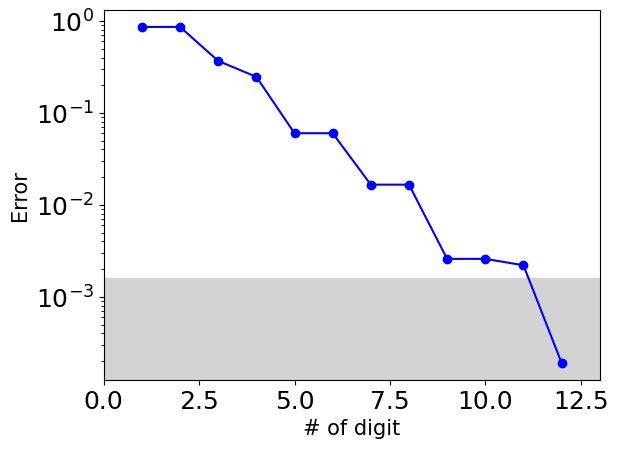

In [ ]:

## plotting the result
result_array = np.array(result_list)
plt.xlabel("# of digit", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.semilogy(result_array[:,0], np.abs(result_array[:,1] - e_trotter), "bo-")
plt.xlim(0,13)
plt.fill_between([0,13], 1.6e-3, color = "lightgrey") ## fill the chemical accuracy region


As expected, we finally reached chemical accuracy at n_itter = 12.

One thing to note here is that the sample code introduced here uses the (controlled) time evolution operator Λ((U(N)Trot)2k)
whose depth grows exponentially with respect to t. That is, exponentially more gates must be used to improve accuracy. Here, we introduced a method based on a simple Trotter decomposition, there have been many studies using other methods to efficiently implement the time evolution operator.